In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Pfad zum Ordner mit den Shapefiles
gdf = gpd.read_file("/Users/I566184/bachelorarbeit_coding/mesogeos/burned_areas_shapefile/med_burned_areas_updated.shp")
gdf['IGNITION_D'] = pd.to_datetime(gdf['IGNITION_D'])
gdf['IGNITION_YEAR'] = gdf['IGNITION_D'].dt.year

In [15]:
gdf.columns

Index(['index', 'id', 'FIREDATE', 'LASTUPDATE', 'COUNTRY', 'PROVINCE',
       'COMMUNE', 'AREA_HA', 'BROADLEA', 'CONIFER', 'MIXED', 'SCLEROPH',
       'TRANSIT', 'OTHERNATLC', 'AGRIAREAS', 'ARTIFSURF', 'OTHERLC',
       'PERCNA2K', 'CLASS', 'YEAR', 'IGNITION_D', 'LAST_DATE', 'LATITUDE',
       'LONGITUDE', 'BRIGHTNESS', 'SCAN', 'TRACK', 'ACQ_DATE', 'ACQ_TIME',
       'SATELLITE_', 'INSTRUMENT', 'CONFIDENCE', 'VERSION', 'geometry_h',
       'geometry', 'IGNITION_YEAR'],
      dtype='object')

In [16]:
gdf

,index,id,FIREDATE,LASTUPDATE,COUNTRY,PROVINCE,COMMUNE,AREA_HA,BROADLEA,CONIFER,...,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE_,INSTRUMENT,CONFIDENCE,VERSION,geometry_h,geometry,IGNITION_YEAR
0,24,179029,2000-11-22 00:00:00,2000-11-22 00:00:00,RO,Tulcea,Chilia Veche,67,0,0,...,1.20,2000-11-19,0939,Terra,MODIS,89.0,6.03,POINT (2337524.4866102715022862 -94228.0925910...,"POLYGON ((2336225.328 -93945.636, 2336895.640 ...",2000
1,732,179007,2000-11-09 00:00:00,2000-11-25 00:00:00,RS,??????? ??????,Surdulica,1916,68.74999999999642,0.7291666666666287,...,1.20,2000-11-15,1005,Terra,MODIS,39.0,6.03,POINT (1833484.3520517814904451 -504068.152738...,"POLYGON ((1835365.535 -506253.749, 1835450.826...",2000
2,733,179009,2000-11-11 00:00:00,2000-11-11 00:00:00,MK,?????????????,Lipkovo,18,0,0,...,1.10,2000-11-15,1005,Terra,MODIS,53.0,6.03,POINT (1771484.7876996877603233 -568473.142161...,"POLYGON ((1771991.070 -568273.250, 1772355.476...",2000
3,734,179011,2000-11-11 00:00:00,2000-11-11 00:00:00,RS,??????? ??????,Surdulica,71.0,85.220125785697,3.7735849056532573,...,1.10,2000-11-17,2059,Terra,MODIS,100.0,6.03,POINT (1831255.7669849372468889 -506610.719740...,"MULTIPOLYGON (((1831674.513 -506392.794, 18317...",2000
4,736,179015,2000-11-11 00:00:00,2000-11-20 00:00:00,RS,?????????? ??????,Medve?a,123,86.77685950406051,0,...,1.10,2000-11-12,0934,Terra,MODIS,35.0,6.03,POINT (1769530.6227446950506419 -491961.315616...,"POLYGON ((1769204.989 -491775.237, 1769285.041...",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23220,50590,211228,2022-10-21 00:45:00,2022-10-25 02:00:00,DZ,N.A.,N.A.,64,0,66.15384615374438,...,1.00,2022-10-24,1032,Terra,MODIS,13.0,6.1NRT,POINT (59166.1673698804806918 -1263691.4507965...,"POLYGON ((58503.130 -1264450.726, 58486.263 -1...",2022
23221,50591,211229,2022-10-23 12:17:00,2022-10-25 02:00:00,DZ,N.A.,N.A.,95,0,4.0404040403999595,...,1.18,2022-10-23,1249,Aqua,MODIS,79.0,6.1NRT,POINT (53098.5414202685933560 -1259050.2539729...,"POLYGON ((53228.347 -1257369.788, 53287.725 -1...",2022
23222,50595,211234,2022-10-21 10:28:00,2022-10-22 00:24:00,RO,Tulcea,Cri?an,22,0,0,...,1.10,2022-10-21,1128,Aqua,MODIS,66.0,6.1NRT,POINT (2337797.2193978829309344 -125224.014943...,"POLYGON ((2337566.898 -124211.514, 2337588.594...",2022
23223,50597,211236,2022-10-24 12:51:00,2022-10-24 13:40:00,DZ,N.A.,N.A.,100,0,0,...,1.05,2022-10-24,1331,Aqua,MODIS,100.0,6.1NRT,POINT (-270572.8231974402442575 -1406621.12862...,"POLYGON ((-269498.695 -1405572.906, -269328.39...",2022


In [23]:
gdf["CLASS"].unique()
gdf["CLASS"].unique()

array(['FireSeason', '30DAYS', '7DAYS', '1DAY'], dtype=object)

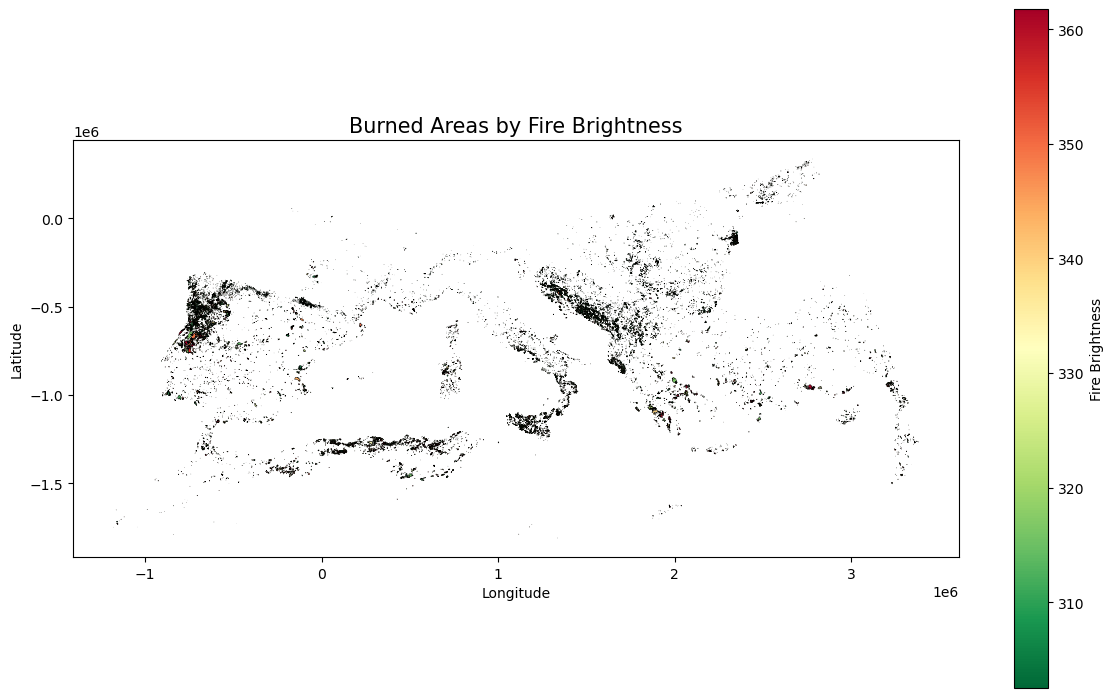

In [21]:
# Optional: Explode MultiPolygons in einzelne Polygone
gdf = gdf.explode(index_parts=False).reset_index(drop=True)

vmin = gdf['BRIGHTNESS'].quantile(0.05)
vmax = gdf['BRIGHTNESS'].quantile(0.95)


# Plot nach BRIGHTNESS einfärben
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='BRIGHTNESS',
         cmap='RdYlGn_r',  # Umgedreht: Grün (niedrig) → Rot (hoch)
         linewidth=0.3,
         vmin= vmin, 
         vmax=vmax,
         ax=ax,
         legend=True,
         legend_kwds={'label': "Fire Brightness", 'shrink': 0.7},
         edgecolor='black')

# Achsen und Titel
ax.set_title("Burned Areas by Fire Brightness", fontsize=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()

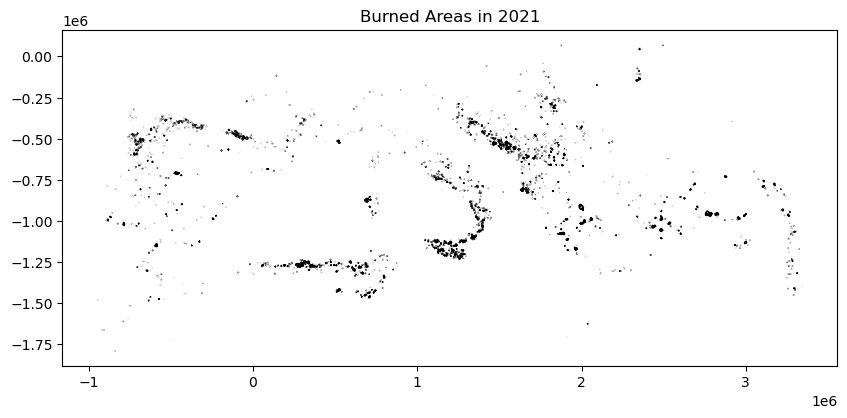

In [10]:
gdf_year = gdf[gdf['IGNITION_YEAR'] == 2021]
gdf_year.plot(figsize=(10, 10), edgecolor='black', facecolor='none')
plt.title("Burned Areas in 2021")
plt.show()
